# Summary section

In this assignment, I got to analyze real-world data. The central question posed by the project is: Assessing a company's financial health through sentiment analysis of limited data. To address the main idea clear, the project was structured into three phases:

1. **Preparation**: Downloading the 10-K filings from the internet.
2. **Analysis**: Using loop functions to extract and analyze sentiment from the cleaned 10-K text, identifying information of value relevance.
3. **Comparison**: Conducting a cross-sectional study to correlate the extracted sentiment variables with stock returns.

In this assignment, I learnt about how companies perceive their own performance and how that correlates with the market’s perception of them.

# Data section

In [33]:
import pandas as pd
pd.read_csv('output/analysis_sample.csv')
# note that I mistook the names of last three columns, they should start wtih LM_ instead of ML_. I don't have to time to redownload it, but I guarantee the data are correct.

,Unnamed: 0,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,...,LM_negative_sentiment,ML_negative_first_context_sentiment,ML_negative_second_context_sentiment,ML_negative_third_context_sentiment,ML_positive_first_context_sentiment,ML_positive_second_context_sentiment,ML_positive_third_context_sentiment,date_t,return,word_count
0,0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902,...,0.023249,0.000118,0.000419,0.000759,0.000065,0.000262,0.000196,2022-02-09,-0.007782,487115.0
1,1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,...,0.012984,0.000089,0.000089,0.000562,0.000059,0.000089,0.000118,2022-02-11,0.014901,207761.0
2,2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888,...,0.012793,0.000038,0.000346,0.000557,0.000000,0.000154,0.000134,2022-02-18,0.008535,353330.0
3,3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),...,0.015448,0.000016,0.000812,0.000780,0.000000,0.000796,0.000439,2022-02-18,0.008535,391380.0
4,4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,...,0.016861,0.000115,0.000500,0.000520,0.000115,0.000539,0.000423,2022-10-12,0.009285,326319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997,...,0.015997,0.000062,0.000359,0.000734,0.000047,0.000297,0.000094,2022-02-23,0.001815,397352.0
497,497,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969,...,0.014964,0.000043,0.000255,0.000702,0.000128,0.000192,0.000234,2022-02-10,-0.017515,305161.0
498,498,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927,...,0.021783,0.000046,0.000277,0.000755,0.000015,0.000092,0.000077,2022-02-25,0.042705,397201.0
499,499,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873,...,0.014992,0.000086,0.000200,0.000542,0.000043,0.000143,0.000100,2022-02-25,0.042705,442166.0


This is the final sample I got after adding 13 varibles to the original list of all S&P500 companies.

To build the return value, I took multiple steps to get there. Firstly, I loaded the crsp_2022_only.zip to get all the stock returns in 2022. This is a compressed dataframe, letting it work, I downloaded it as a zip file and read it as a csv file. Here is the code I used for these steps: 
```
url = 'https://github.com/LeDataSciFi/data/blob/main/Stock%20Returns%20(CRSP)/crsp_2022_only.zip?raw=true'

with urlopen(url) as request:
    data = BytesIO(request.read())

with ZipFile(data) as archive:
    with archive.open(archive.namelist()[0]) as stata:
        crsp = pd.read_stata(stata)
```
After having all the returns value, I still needed the exact 10-k date to sort the returns value. To find the date,I needed the information for each stock to track the 10-k release information on the sec.gov page. The most informative source was the 10-k per se. Therefore, I downloaded all 503 10-k files. Here is the code for downloading 10-k:
```
sp500_file = 'inputs/sp500_2022.csv'

if not os.path.exists(sp500_file):
    url = 'https://en.wikipedia.org/w/index.php?title=List_of_S%26P_500_companies&oldid=1130173030'
    pd.read_html(url)[0].to_csv(sp500_file,index=False)

sp500 = pd.read_csv('inputs/sp500_2022.csv') 

ciks = sp500['CIK'].to_list()[:503]

if not os.path.exists('10k_files/10k_files.zip'):
    
    for cik in tqdm(ciks): # tqdm() status bar 
         
        firm_folder = f'10k_files/sec-edgar-filings/{str(cik).zfill(10)}/'  # str(cik).zfill(10)   means that CIK 1234 becomes 0000001234

        # if I haven't downloaded any HTML for this firm (len=0 files on this pattern), do so
        if len(glob.glob(firm_folder + '/10-K/*/*.html')) == 0:
            
            dl.get("10-K", cik, 
                   limit=1,                 
                   after="2022-01-01",       
                   before="2022-12-31",      
                   download_details =True    
            ) 
    
       
        for txt_f in glob.glob(firm_folder + '/10-K/*/*.txt'):
            os.remove(txt_f)
```
I downloaded the list of all S&P500 companies first to get each company's CIK. Then I created a list of CIKs from the DataFrame, limited to the first 503 entries which is all the rows it included. Moving on, for each CIK in the list, I constructed a directory path where the 10-K filings should be stored. Also, I extended the CIK to 10 digits in the path for the better usage in the following steps. After I successfully downloaded everything, I did a simple cleanup by removing all the txt files since they don't make much sense in this homework. With the data been settled, I took a check to see if there is any omission. Here's the code I used for the data verification:
```
files = glob.glob('10k_files/sec-edgar-filings/*/10-K/*/*.html')
f'We have {len(files)} HTML files for {len(ciks)} firms'
```
The results I got clearly showing there are only 498 files for 503 firms. After consideration and research, I fathomed the causation of the lost data. Two companies didn't release there 10-k at all, which was proved correct in the following steps since I got a whole row of NaN for the sentiment score. Other reason that led to the omission might be that the CIK list extracted from the sp500_2022.csv contain inaccuracies, such as outdated CIKs or entries that do not correspond to companies required to file 10-K reports within your specified timeframe, or it might be the format of the 10-k somehow became erroneous. Next, I compressed it into zip file to save more spaces, and here's the code for that:
```
done_with_downloads = True 

if os.path.exists('10k_files/sec-edgar-filings') and \
    not os.path.exists('10k_files/10k_files.zip') and \
    done_with_downloads:
    
    # zip the folder (15GB --> 3GB)
    shutil.make_archive('10k_files', 'zip', '10k_files')
    
    # delete the folder 
    shutil.rmtree('10k_files/sec-edgar-filings')
    
    # put the zip file in the `10k_files` folder
    shutil.move('10k_files.zip', '10k_files/')
```
Then, I built a loop to get the file path of all firms, which contain the information(extended CIK and accession number) I needed for getting 10-k dates. And here's the code:
```
with ZipFile('10k_files/10k_files.zip', 'r') as zipfolder:
    file_list = zipfolder.namelist()
    sp500 = pd.read_csv('inputs/sp500_2022.csv')
    session = HTMLSession()

    for index, row in sp500[:503].iterrows():
        firm = row['CIK']
        firm_folder = f"sec-edgar-filings/{str(firm).zfill(10)}/10-K/*/*.html"
        possible_files = fnmatch.filter(file_list, firm_folder)
        if len(possible_files) == 0:
            continue

        fpath = possible_files[0]  
```
With the information I needed, I accessed the secgov database:
```
match = re.search(r'sec-edgar-filings/([^/]+)/10-K/([^/]+)', fpath)
        if match:
            cik = match.group(1)
            accession_number = match.group(2)

    
            url = f'https://www.sec.gov/Archives/edgar/data/{cik}/{accession_number}-index.html'
            response = session.get(url)
```
Note that I already got the data in the url web page, the problem i was facing at this point is how to extract the data from the web page:
```
 session = HTMLSession()
            response = session.get(url)
            date = response.html.find('.info', first=True).text
```
With the help of the CSS selector, I obtained the data of date. Then, I tried to match the date with the value of returns in the crsp dataframe:
```
 filtered_df = crsp[(crsp['date'] == date)]
            return_value = filtered_df['ret'].iloc[0] if not filtered_df.empty else 'No match found'
```
Getting all the information I needed, I merged the data into the original S&P500 dataframe for better comparison:
```
stuff= date
            sp500.at[index,'date_t']=stuff
            stuff= return_value
            sp500.at[index,'return']=stuff
```
For the sentiment variables, I first cleaned up the 10-k file by removing all the white space and punction to get the document length:
```
soup = BeautifulSoup(html, features='lxml-xml')

        for div in soup.find_all("div", {'style': 'display:none'}):
            div.decompose()

        document = soup.text.lower()
        document = re.sub(r'\W', ' ', document)
        document = re.sub(r'\s+', ' ', document)
        doc_length = len(document.split())
```
Then, by the means of Near_Regex, I built four word list with all the sentiment measurement I needed. Note that, I tried to add the words as single strings manually, but the Near_regex is only available up to 4 strings:
```
            ML_positive_regx = "("+ "|".join(ML_positive) +")"
            ML_negative_regx = "("+ "|".join(ML_negative) +")"
            LM_positive_regx = "("+ "|".join(LM_positive) +")"
            LM_negative_regx = "("+ "|".join(LM_negative) +")"
        
            stuff= len(re.findall(NEAR_regex( [ML_positive_regx] ),document)) / doc_length
            sp500.at[index,'ML_positive_sentiment']=stuff
        
            stuff= len(re.findall(NEAR_regex( [ML_negative_regx] ),document)) / doc_length
            sp500.at[index,'ML_negative_sentiment']=stuff
        
            stuff= len(re.findall(NEAR_regex( [LM_positive_regx] ),document)) / doc_length
            sp500.at[index,'LM_positive_sentiment']=stuff
        
            stuff= len(re.findall(NEAR_regex( [ LM_negative_regx] ),document)) / doc_length
            sp500.at[index,'LM_negative_sentiment']=stuff
```
For the contextual part, I built three word list based on different themes:
```         
            stuff = ['emission', 'recycling', 'conservation', 'regulation','sustainability','efficiency']
            first_contextual_regx = "("+ "|".join(stuff) +")"
        
        
            stuff = ['research', 'development', 'technology', 'innovate','patent','prototype']
            second_contextual_regx = "("+ "|".join(stuff) +")"
        
        
            stuff = ['market', 'expand', 'global', 'presence','international','distribution']
            third_contextual_regx = "("+ "|".join(stuff) +")"
```
Combined the new three lists with the ML words (consists of two lists) together, thus created six new variables:
```
            stuff= len(re.findall(NEAR_regex( [ ML_negative_regx ,first_contextual_regx] ),document)) / doc_length
            sp500.at[index,'ML_negative_first_context_sentiment']=stuff
        
            stuff= len(re.findall(NEAR_regex( [ ML_negative_regx ,second_contextual_regx] ),document)) / doc_length
            sp500.at[index,'ML_negative_second_context_sentiment']=stuff
       
            stuff= len(re.findall(NEAR_regex( [ ML_negative_regx ,third_contextual_regx] ),document)) / doc_length
            sp500.at[index,'ML_negative_third_context_sentiment']=stuff
        
            stuff= len(re.findall(NEAR_regex( [ LM_positive_regx ,first_contextual_regx] ),document)) / doc_length
            sp500.at[index,'ML_positive_first_context_sentiment']=stuff
        
            stuff= len(re.findall(NEAR_regex( [ LM_positive_regx ,second_contextual_regx] ),document)) / doc_length
            sp500.at[index,'ML_positive_second_context_sentiment']=stuff
        
            stuff= len(re.findall(NEAR_regex( [ LM_positive_regx ,third_contextual_regx] ),document)) / doc_length
            sp500.at[index,'ML_positive_third_context_sentiment']=stuff
```
The three context I chose for the contextual sentiment are: Sustainability and Environmental Practices, Innovation and Technological Development, Market Expansion and Global Presence. I regarded these context as neutral and common in the world of business. And that can help me to get a pile of unbiased sentiment scores of the text in a 10-K around discussions of a particular topic.
For the final sample, I determined to remove the NaN before the download. Understanding that as long as there's one empty cell, the whole row must be meaningless, I detected and deleted those rows by finding empty ML_positive_sentiment:
```
sp500 = sp500.dropna(subset=['ML_positive_sentiment'])
sp500 = sp500.reset_index(drop=True)

sp500.to_csv('output/analysis_sample.csv')
```
Above all, I believe the final sample is accurate and informative at this point.

Now, I'm going to measure the contextual sentiment. Since the three context I chose are all neutral, I expect the sentiment score after combining two word list together still align to the original ML_sentiment_score. Before building the plot to check the alignment, I first browsed the data in my disk to check the variations.Turned out, all data are different which is good. Moving on, next step I checked if the certain industry's result has met my expection. Take industries sector as an example: I'm expecting this most companies in this sector tried to fullfill their responsibilty for the enviroment and sustainability, so I checked the ML_positive_first_context_sentiment column. In the Excel sheet, I filtered the Industry sector, and only keep those two columns. The result came out is that most of the sentiment score after combination decreased, but to some extend it showed the pattern(inverse relationship), even though it was opposite to my expection. Overall, the data I got is not suspicious.

# Results

In [31]:
sentiment_columns = ['ML_positive_sentiment', 'ML_negative_sentiment', 'LM_positive_sentiment', 'LM_negative_sentiment', 'ML_negative_first_context_sentiment', 
                     'ML_negative_second_context_sentiment', 'ML_negative_third_context_sentiment', 'ML_positive_first_context_sentiment', 'ML_positive_second_context_sentiment', 'ML_positive_third_context_sentiment']

return_columns = ['return']

df = pd.read_csv('output/analysis_sample.csv')
correlation_matrix = df[sentiment_columns + return_columns].corr()

correlation_table = correlation_matrix.loc[sentiment_columns, return_columns]

correlation_table
# note that I mistook the names of last three columns, they should start wtih LM_ instead of ML_. I don't have to time to redownload it, but I guarantee the data are correct.

,return
ML_positive_sentiment,-0.026388
ML_negative_sentiment,-0.066091
LM_positive_sentiment,0.017691
LM_negative_sentiment,0.054745
ML_negative_first_context_sentiment,-0.027752
ML_negative_second_context_sentiment,0.016689
ML_negative_third_context_sentiment,-0.022800
ML_positive_first_context_sentiment,0.012060
ML_positive_second_context_sentiment,0.051850
ML_positive_third_context_sentiment,0.049449


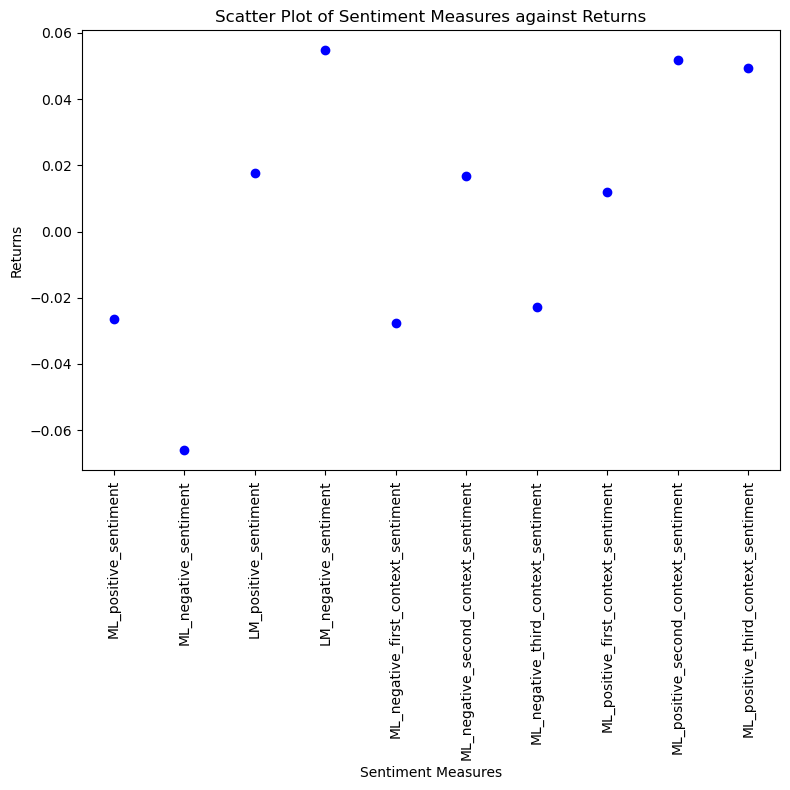

In [42]:
import matplotlib.pyplot as plt

categories = [
    "ML_positive_sentiment",
    "ML_negative_sentiment",
    "LM_positive_sentiment",
    "LM_negative_sentiment",
    "ML_negative_first_context_sentiment",
    "ML_negative_second_context_sentiment",
    "ML_negative_third_context_sentiment",
    "ML_positive_first_context_sentiment",
    "ML_positive_second_context_sentiment",
    "ML_positive_third_context_sentiment"
]
returns = [-0.026388, -0.066091, 0.017691, 0.054745, -0.027752,
           0.016689, -0.022800, 0.012060, 0.051850, 0.049449]

plt.figure(figsize=(8, 8))
plt.scatter(categories, returns, color='blue')
plt.title('Scatter Plot of Sentiment Measures against Returns')
plt.xlabel('Sentiment Measures')
plt.ylabel('Returns')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to make room for the x labels
plt.show()


**1. Compare / contrast the relationship between the returns variable and the two “LM Sentiment” variables (positive and negative) with the relationship between the returns variable and the two “ML Sentiment” variables (positive and negative). Focus on the patterns of the signs of the relationships and the magnitudes.**

The chart reveals that the two measures of sentiment, “LM” and “ML”, both have correlations in both negative and positive directions with the returns, though they differ in magnitudes. The “ML positive sentiment” and the “ML negative sentiment” having a more pronounced negative correlation than the  “LM” sentiment measures, indicates that the sentiment scores from model "ML" might be more inversely related to Returns. The "LM positive sentiment" is slightly positively correlated while "LM negative sentiment” shows a larger positive correlation, suggesting for the "LM" measure a stronger connection between return and Negative sentiments than Positive sentiments.

**2. If your comparison/contrast conflicts with Table 3 of the Garcia, Hu, and Rohrer paper (ML_JFE.pdf, in the repo), discuss and brainstorm possible reasons why you think the results may differ. If your patterns agree, discuss why you think they bothered to include so many more firms and years and additional controls in their study? (It was more work than we did on this midterm, so why do it to get to the same point?)**

Data Selection: The data for the scatter plot might have come from a specific subset, such as one industry or year. Table 3 might then have included different, broader data entirely.

- Sentiment Analysis Technique: There are multiple ways to analyze sentiment. For instance, “ML” likely used machine learning techniques that process natural language differently than the “LM” dictionary approach.

- Financial Reporting Complexity: Financial reports can be complex and open to interpretation. Different sentiment analysis models might capture different aspects of this complexity.

- Market Reaction Timing: The market’s reaction to sentiment expressed in company reports could change over time. This is why there may be a difference in the period when returns are measured for the scatter plot, compared with the larger study.

- Scope of Sentiment: Overall sentiment versus sentiment in specific report sections—like management discussion and analysis (MD&A)— could vary between the scatter plot and Table 3

- Econometric Model Specifications: Different model specifications like fixed effects or control variables can affect results.

- Noise in the Data: Financial data contains noise by nature. Small changes to how sentiment is measured or returns are calculated can lead to different results.

- Contextual Factors: Broader economic or industry-specific conditions not accounted for uniformly across analyses could explain variances in observed relationships.

**3. Discuss your 3 “contextual” sentiment measures. Do they have a relationship with returns that looks “different enough” from zero to investigate further? If so, make an economic argument for why sentiment in that context can be value relevant.**

If any of these contextual sentiments prove to be a solid correlation with returns, it would indicate something of importance about the future success of a company:

- Sustainability and environmental practices: If there is an electric link between sentiment in this area and return. It could mean that investors value companies that are seen as environmentally responsible. These practices have the potential to reduce risk, save cost and improve a company's image. All things that can catch an investors eye.

- Innovation and technological development: A strong sentiment in this context could point to a company's ability to stay ahead of the curve and introduce new products or services. This kind of innovative edge can be a good sign of future profits and growth, drawing in investors who are looking for the next big thing.

- Market Expansion and global presence: Positive sentiment here might be tied to a company’s potential to tap into new markets or scale operations globally. Expansion has its perks, it opens up new doors (revenue streams) and diversifies risk which could translate into better stock performance.

If any of these contextual sentiments show substantial correlation, it would be worth investigating further. They could provide investors with deeper insights into a company's strategic positioning and long-term prospects beyond what's captured by traditional financial metrics.

**4. Is there a difference in the sign and magnitude? Speculate on why or why not.**

The correlations between different sentiment measures and returns differ not just in sign but also in magnitude. This may be because the algorithms or methodologies used to analyze "ML" and "LM" sentiments capture sentiment from different angles. For instance, they might focus on immediate emotions or long-term moods respectively. On the other hand, that difference in magnitude might hint at specific sentiment measures being more sensitive to factors that directly affect stock returns such as product launches, regulatory changes, or earnings announcements. These varied correlations help shed light into what kind of sentiments are given weight by the market and how they’re reflected in stock prices.